In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
from sklearn.svm import SVC

In [27]:
svc = SVC(kernel = 'linear' , random_state = 0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [28]:
y_pred = svc.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
asc = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [30]:
cm

array([[46,  2],
       [13, 19]], dtype=int64)

In [31]:
asc

0.8125

In [32]:
cr

'              precision    recall  f1-score   support\n\n           0       0.78      0.96      0.86        48\n           1       0.90      0.59      0.72        32\n\n    accuracy                           0.81        80\n   macro avg       0.84      0.78      0.79        80\nweighted avg       0.83      0.81      0.80        80\n'

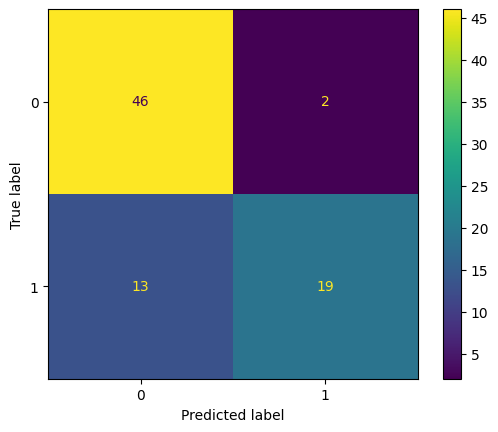

In [33]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_21580\3418775250.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


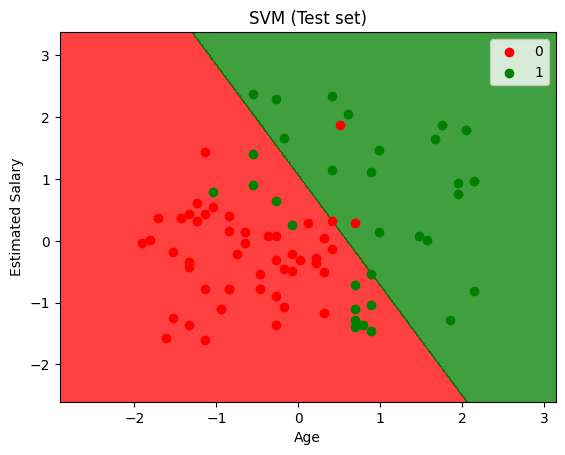

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
